In [304]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
#Reading the dataset
dataset = pd.read_csv("california_housing_train.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [306]:
dataset.shape

(17000, 9)

In [307]:
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [308]:
dataset.duplicated().any()

False

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-p

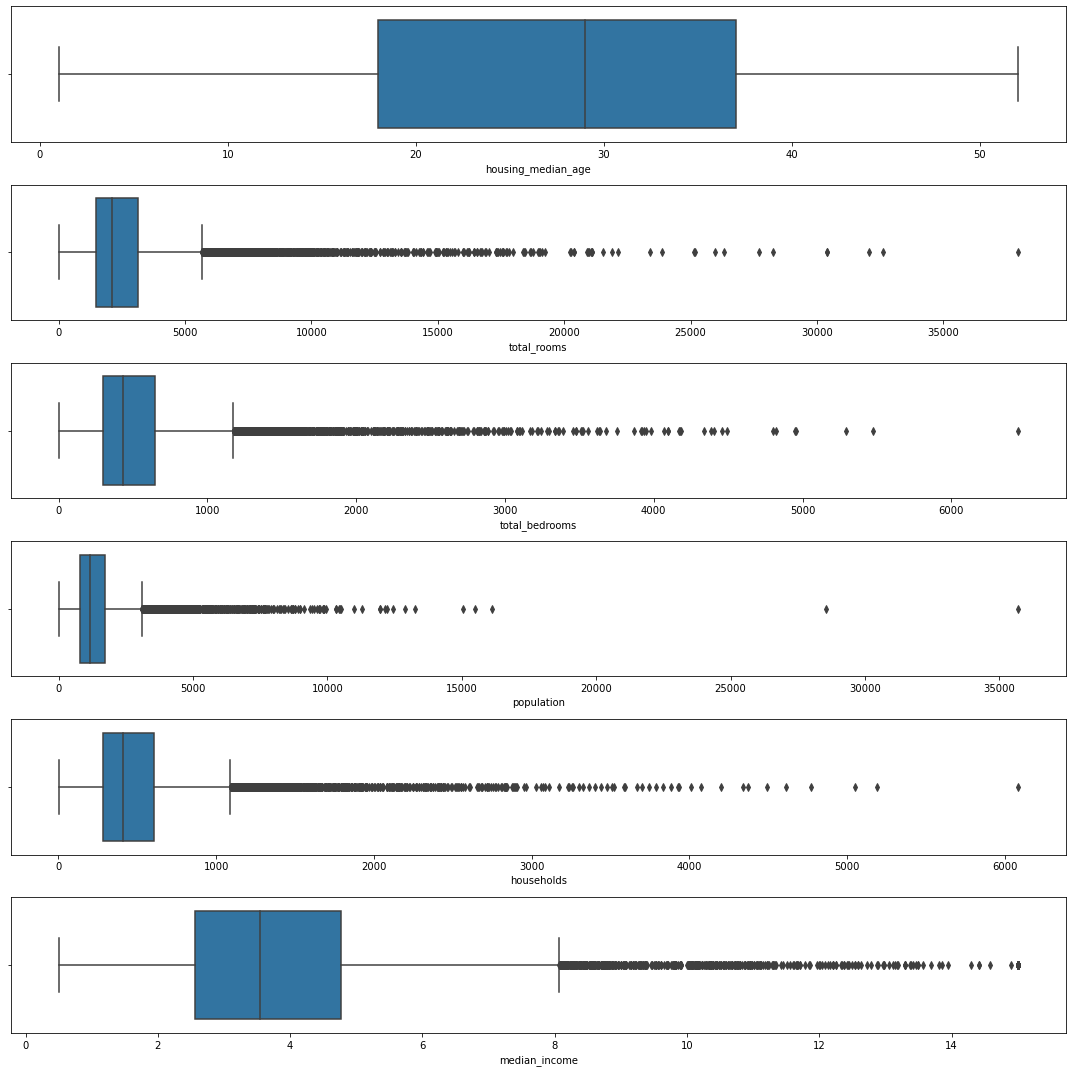

In [309]:
fig, axs = plt.subplots(6, figsize = (15,15))
plt1 = sns.boxplot(dataset['housing_median_age'], ax = axs[0])
plt2 = sns.boxplot(dataset['total_rooms'], ax = axs[1])
plt3 = sns.boxplot(dataset['total_bedrooms'], ax = axs[2])
plt4 = sns.boxplot(dataset['population'], ax = axs[3])
plt5 = sns.boxplot(dataset['households'], ax = axs[4])
plt6 = sns.boxplot(dataset['median_income'], ax = axs[5])
plt.tight_layout()

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


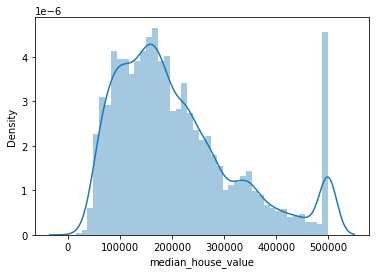

In [310]:
sns.distplot(dataset['median_house_value']);

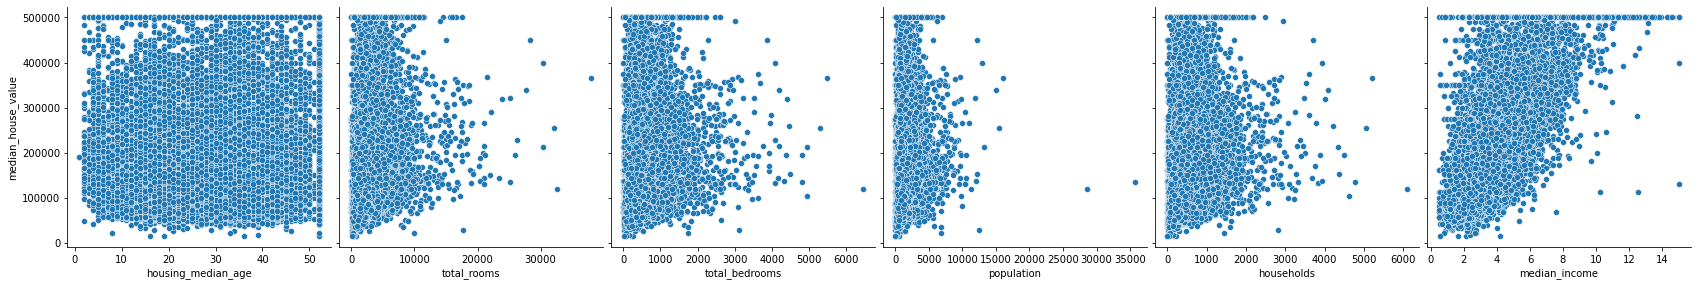

In [311]:
sns.pairplot(dataset, x_vars=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'], y_vars='median_house_value', height=4, aspect=1, kind='scatter')
plt.show()

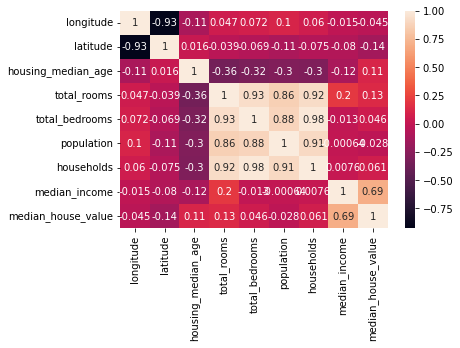

In [312]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [314]:
#Setting the value for X and Y
x = dataset[['median_income']]
y = dataset['median_house_value']

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 2000)

In [316]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [317]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  42747.84014554063
Coefficient: [42288.38916287]


In [318]:
print('Regression Equation: median_house_value = 42747.84014554063 + 42288.38916287 * median_income')

Regression Equation: median_house_value = 42747.84014554063 + 42288.38916287 * median_income


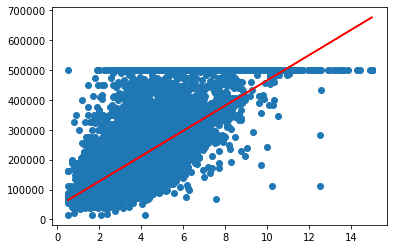

In [319]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 42747.84014554063 + 42288.38916287 * x_train, 'r')
plt.show()

In [320]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)  

In [321]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [108447.08154897 201329.2995063  229269.23822621 ... 216544.6619271
 284654.34151282 124893.03609441]


In [322]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
10387,58300.0,108447.081549
7353,172600.0,201329.299506
13505,223500.0,229269.238226
15832,308400.0,234369.217959
5231,167600.0,201904.421599
...,...,...
11473,276100.0,304694.809137
16556,169700.0,165836.654482
9924,108200.0,216544.661927
16520,344100.0,284654.341513


In [323]:
#Predict for any value
slr.predict([[1]])

array([85036.22930841])

In [324]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 47.87


In [325]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 62414.67009863582
Mean Square Error: 7006810448.981695
Root Mean Square Error: 83706.69297602012


In [326]:
#Setting the value for X and Y
x = dataset[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = dataset['median_house_value']

In [328]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [329]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

-47261.84144924657


[('housing_median_age', 1876.155157418424),
 ('total_rooms', -19.408083192919975),
 ('total_bedrooms', 97.71250938025607),
 ('population', -33.78717060239473),
 ('households', 123.24427692561983),
 ('median_income', 47896.55571866005)]

In [330]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  

In [331]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [108489.95496125 171865.63031909 151770.12218401 ... 237871.38825955
 186399.09002696 137588.32386517]


In [332]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
1559,500001.0,108489.954961
5775,113600.0,171865.630319
10247,107200.0,151770.122184
5234,201000.0,272271.939870
1416,198500.0,197971.857137
...,...,...
5163,185100.0,162644.433642
16163,366700.0,267256.373991
3899,230400.0,237871.388260
8021,145200.0,186399.090027


In [335]:
#Predict for any value
mlr.predict([[2, 3, 4, 5, 6, 7]])

array([292669.51449269])

In [336]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 57.13


In [337]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 56544.685532944866
Mean Square Error: 5851175376.291549
Root Mean Square Error: 76492.97599316912


In [1]:
print('Multi Linear Regression lebih akurat ', 57.13 - 47.87,'% dari Single Linear Regression')

Multi Linear Regression lebih akurat  9.260000000000005 % dari Single Linear Regression
